### Read in and analyze data from Wenhan and Harvey's optimization codes
Note: this program assumes that the data will be in a the same directory as the "Data" directory which holds all of the data from these runs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime
import pytz
import pickle
from mpl_toolkits.mplot3d import Axes3D
import os

%matplotlib inline
plt.rcParams['figure.dpi']=200
plt.rcParams['font.family'] = 'Serif'

In [2]:
def savePNG(pngname): 
    plt.savefig(pngname+".png", bbox_inches="tight", facecolor='w')
    
def load_data(filename):
    with open(filename) as datafile:
        content = datafile.readlines()
        data = np.array([np.fromstring(c, sep=' ') for c in content])
    return data

def load_files(data_dir, start_with=''):
    # return a list of nd arrays containing datafiles in the data_dir
    datafiles = [s for s in os.listdir(data_dir) if s[:len(start_with)] == start_with ]
    print("%d data files found"%len(datafiles))
    
    dataset = []
    for i in range(len(datafiles)):
        datafile = datafiles[i]
        dataset.append(load_data(data_dir+datafile))
    
    return dataset

In [3]:
labels = ['loop time [s]','wall time [s]',r'beam current [$\mu$A]','drain current [mA]','bias current[mA]',
          r'P$_\mathrm{inj}$ [torr]',r'P$_\mathrm{ext}$ [torr]',
          r'I$_\mathrm{inj}$ [A]',r'I$_\mathrm{ext}$ [A]',r'I$_\mathrm{mid}$ [A]',r'I$_\mathrm{sext}$ [A]',
          'xray Src']

In [4]:
# Load all files starting with "mon" in the data_dir
exp_num = 2
data_dir = "Data/First Run/" if exp_num == 1 else "Data/Second Run/"

dataset = load_files(data_dir, start_with='mon')

20 data files found


In [5]:
xpts=[]
ypts=[]
zpts=[]
sizepts=[]
magpts=[]

xi = 9
yi = 8
zi = 7
szi = -1
mgi = 2

for setnum in range(len(dataset)):
    data = dataset[setnum]*1
    try:
        inewset=np.where(np.diff(data[:,0])<0)[0]
    except:
        continue

    for i in range(len(inewset)):
        iend=inewset[i]+1
        if i==0: istart=0
        xpts.append(np.mean(data[istart:iend,xi]))
        ypts.append(np.mean(data[istart:iend,yi]))
        zpts.append(np.mean(data[istart:iend,zi]))
        sizepts.append(i)
        magpts.append(np.mean(data[istart:iend,mgi]))
        istart=iend

## Data Saving

In [11]:
# save all data
data_list = [xpts, ypts, zpts, sizepts, magpts]

open_file = open("Data/data%d.pkl"%exp_num, "wb")
pickle.dump(data_list, open_file)
open_file.close()

In [13]:
with open("Data/data%d.pkl"%exp_num, "rb") as fp:   # Unpickling
    data_list = pickle.load(fp)
    
xpts, ypts, zpts, sizepts, magpts = data_list

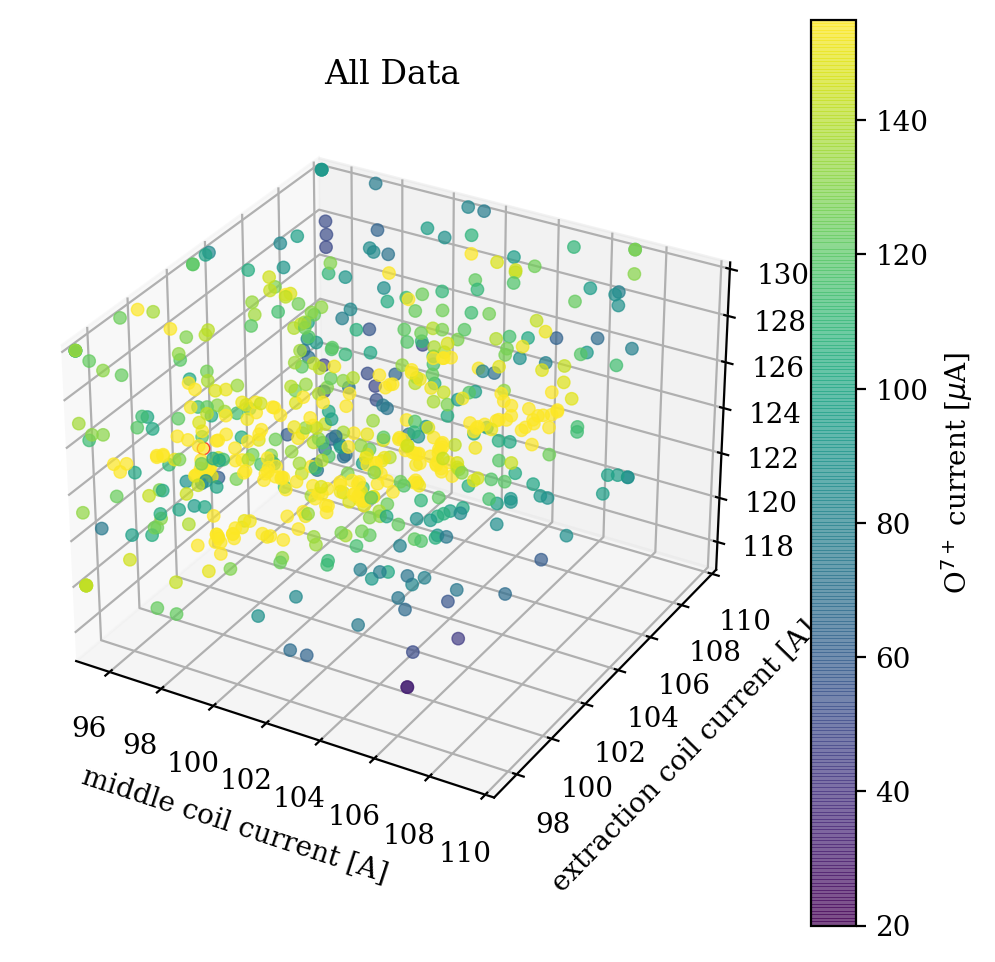

In [14]:
# plotting
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# seperate the best from the rest
bi = np.argmax(magpts) # best i
xr, yr, zr, sr, mr = xpts[:],  ypts[:],  zpts[:], sizepts[:], magpts[:]
xb, yb, zb, sb, mb = xr.pop(bi),  yr.pop(bi),  zr.pop(bi), sr.pop(bi), mr.pop(bi)

graph = ax.scatter(xr, yr, zr,
           c=mr, vmin=20,vmax=155, linewidths=0.5, alpha=.7)
ax.scatter(xb, yb, zb, 
           c=mb, vmin=20,vmax=155, edgecolor='red', linewidths=0.5, alpha=.7)

cbar = fig.colorbar(graph)
cbar.set_label(r'O$^{7+}$ current [$\mu$A]')
ax.set_xlabel('middle coil current [A]')
ax.set_ylabel('extraction coil current [A]')
ax.set_zlabel('other coil current [A]')

ax.set_xlim([95,110])
ax.set_ylim([97,110])
ax.set_zlim([117,130])

plt.title("All Data")
savePNG('All Data')
plt.show()

# Model Loading Example

In [8]:
gpr_model = pickle.load(open("Models/gprMatern0.66.dump","rb"))
normalizer = lambda X: (X - [103.16726412, 103.05644853, 122.86389106] )/ [3.54492885, 3.87407133, 3.28592364]
func = lambda x,y,z: gpr_model.predict(normalizer(np.array([[x,y,z]])))[0]

In [9]:
func(110,110,120)

43.99047570001613